# Gausova Kvadratura a Legendrovy polynomy

imports:

In [1]:
import karhunenLoeve as kl
from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
import numpy as np
import time


# Legendre Polynomials

#### Legendre:

(1000,)


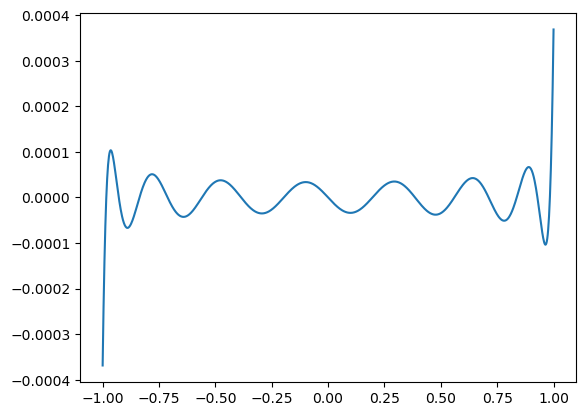

In [2]:
matrix_size=15
t = np.linspace(-1, 1, 1000)
print(t.shape)
l = kl.integ.legendre(t, 30)
plt.plot(t, l[matrix_size])

#### Normal Legendre:

(1000,)


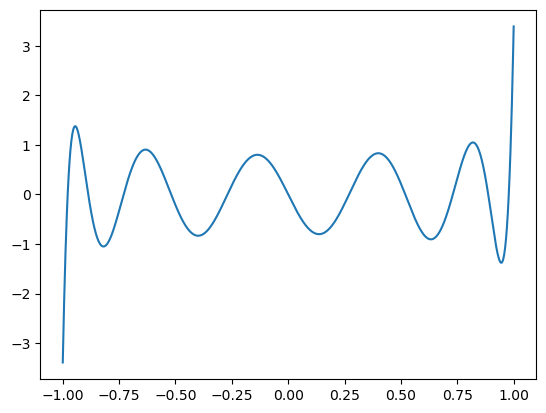

In [3]:
matrix_size=11
t = np.linspace(-1, 1, 1000)
print(t.shape)
l = kl.integ.legendre_normal(t, 50)
plt.plot(t, l[matrix_size])

#### Legendre over interval (a,b):

(1000,)


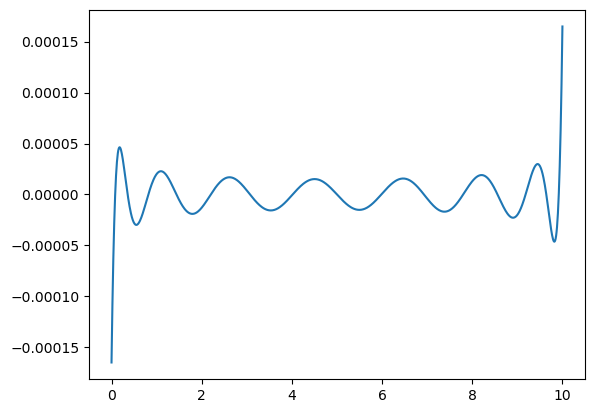

In [4]:
matrix_size=15
a = 0
b = 10
t = np.linspace(a, b, 1000)
print(t.shape)
l = kl.integ.legendre_int(t, 50, a, b)
plt.plot(t, l[matrix_size])

#### Normal Legendre over interval (a,b):

(1000,)


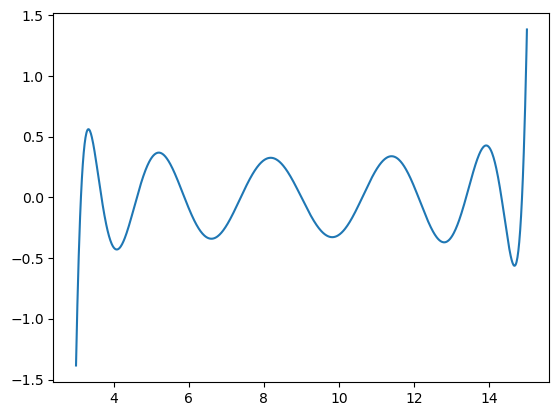

In [5]:
matrix_size=11
a = 3
b = 15
t = np.linspace(a, b, 1000)
print(t.shape)
l = kl.integ.legendre_normal_int(t, 100, a, b)
plt.plot(t, l[matrix_size])

# Calculating integrals using Gauss Quadrature rule and a Jakobi matrix

In [6]:
matrix_size=100
f = lambda x: x**2
fI = lambda x: x**3/3
Gq = kl.integ.quadrature(f,matrix_size)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", fI(1)-fI(-1))
print("error:", Gq - (fI(1)-fI(-1)))

Gauss-quadrature: 0.6666666666666639
actual value of integral: 0.6666666666666666
error: -2.7755575615628914e-15


##### over interval (a,b)

In [7]:
matrix_size = 100
a = 10
b = 25
f = lambda x: np.sin(x)
fI = lambda x: -np.cos(x)
Gq = kl.integ.quadrature_int(f, matrix_size, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", fI(b)-fI(a))
print("error:", Gq - (fI(b)-fI(a)))

Gauss-quadrature: -1.8302743409399347
actual value of integral: -1.830274340939926
error: -8.659739592076221e-15


### testing orthonormality of polynomials

In [8]:
matrix_size=100
n=11
f = lambda x: kl.integ.legendre_normal(x, 50)[n]*kl.integ.legendre_normal(x, 50)[n]
Gq = kl.integ.quadrature(f, matrix_size)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", 1)
print("error:", Gq - 1)

Gauss-quadrature: 0.999999999999995
actual value of integral: 1
error: -4.9960036108132044e-15


In [9]:
a=4
b=20
matrix_size=100
n=11
f = lambda x: kl.integ.legendre_normal_int(x, 100, a, b)[n]*kl.integ.legendre_normal_int(x, 100, a, b)[n]
Gq = kl.integ.quadrature_int(f, matrix_size, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", 1)
print("error:", Gq - 1)

Gauss-quadrature: 0.9999999999999948
actual value of integral: 1
error: -5.218048215738236e-15


## Konvergation graphs 

0.0


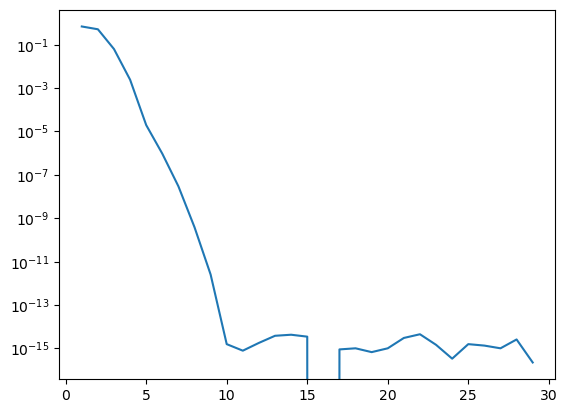

In [10]:
matrix_size = 30
def f(x): return np.exp(x)*np.sin(np.pi*x)
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - 0.67932618340209469947815632370907306163177032877927709391270561911906360182))
plt.plot(n_counts,res)
plt.yscale('log')
print(res[15])

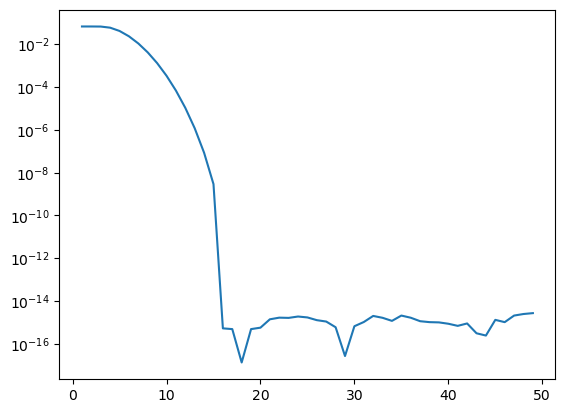

In [11]:
matrix_size=50
f = lambda x: x**30
fI = lambda x: x**31/31
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - (fI(1)-fI(-1))))
plt.plot(n_counts,res)
plt.yscale('log')

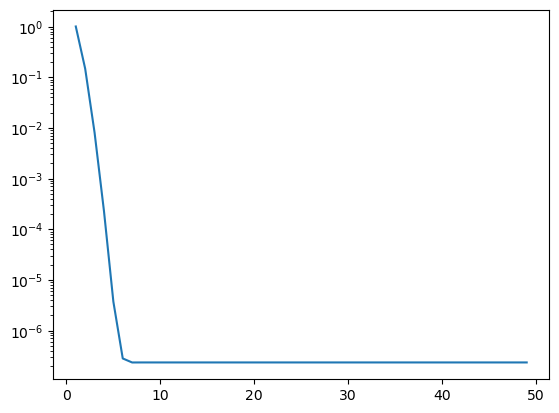

In [12]:
matrix_size=50
a = 5
b = 10
f = lambda x: np.sin(x)/np.log(5*x)
fI = 0.287556
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature_int(f, i, a, b) - fI))
plt.plot(n_counts,res)
plt.yscale('log')

over interval <a,b>

In [13]:
matrix_size=50
f = lambda x: np.sin(x)

#### 2D polynomials:

(100, 120)
(100, 120)


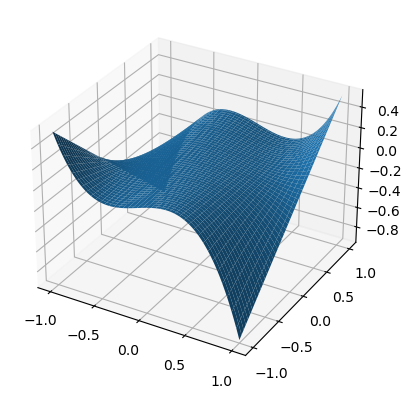

In [14]:
nx, ny = (120, 100)
a = -1
b = 1
c = -1
d = 1
xx = np.linspace(a, b, nx)
yy = np.linspace(c, d, ny)
X, Y = np.meshgrid(xx, yy)
l = kl.integ.generate2DLegendre(X, Y, 500)
print(Y.shape)
print(X.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, l[2])
plt.show()


#### 2D quadrature over interval <a,b>x<c,d>:

In [15]:
nx=500
ny=600
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701

print(kl.integ.quadrature_2d_int(f, nx, ny, a, b, c, d)-fI)

-2.733924198139448e-15


0.07714107601915704


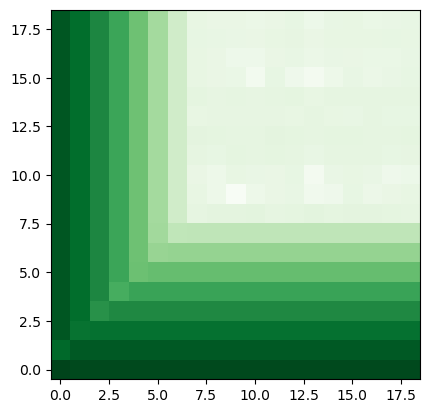

In [16]:
nx=20
ny=20
minx = 1
miny = 1
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701
print(kl.integ.quadrature_2d_int(f, nx, ny, a, b, c, d))

xx=np.arange(minx, nx)
yy=np.arange(miny, ny)

X, Y = np.meshgrid(xx, yy)
res = []
for x in xx:
    res_line = []
    for y in yy:
        res_line.append(kl.integ.quadrature_2d_int(f, x, y, a, b, c, d))
    res.append(res_line)
res = np.array(res)
Z = abs(res-fI)
fig, ax = plt.subplots()

ax.imshow(Z, origin='lower', cmap=colormaps['Greens'], norm=colors.LogNorm())
plt.show()


test zubaté funkce:

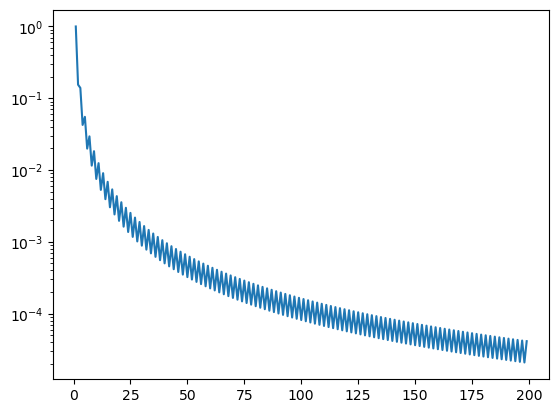

In [45]:
matrix_size=200
f = lambda x: np.abs(x)
fI = 1
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - fI))
plt.plot(n_counts,res)
# asdf = 300
# plt.plot(range(asdf+1, matrix_size),res[asdf:])
plt.yscale('log')

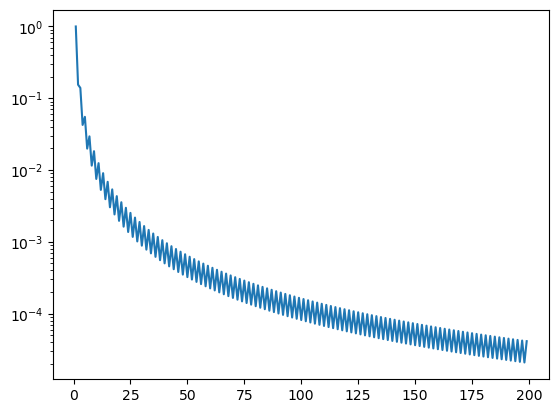

In [38]:
matrix_size=200
f = lambda x: np.abs(x) + np.abs(x+0.5) - np.abs(x-0.5)
fI = 1
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - fI))
plt.plot(n_counts,res)
plt.yscale('log')

test nespojité funkce

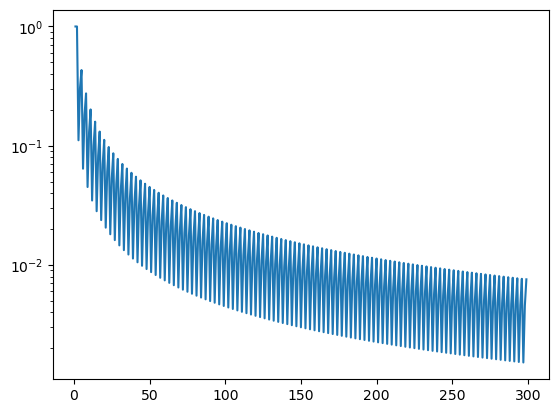

In [42]:
matrix_size=300
f = lambda x: np.sign(x+0.5)
fI = 1
res = []
n_counts = range(1, matrix_size)
for i in n_counts:
    res.append(abs(kl.integ.quadrature(f, i) - fI))
plt.plot(n_counts,res)
plt.yscale('log')

In [64]:
n = 4
f = lambda x: np.sign(x+0.5)
fI = 1
aprox = []
difference = []
times = []
node_range = range(15,1000)
#node_range = range(1,n+20)
for i in node_range:
    starttime = time.time()
    int_aprox = kl.integ.quadrature(f, i)
    endtime = time.time()

    aprox.append(int_aprox)
    difference.append(np.abs(int_aprox-fI))
    times.append(endtime-starttime)

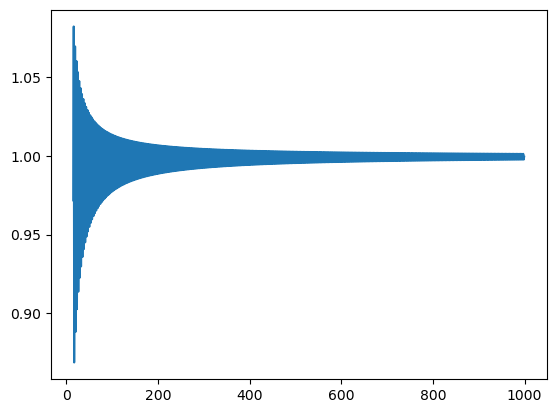

In [48]:
plt.plot(n_counts,aprox)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

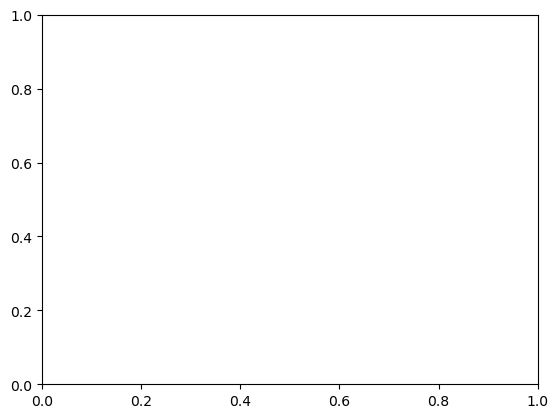

In [94]:
plt.plot(node_range,difference)
plt.yscale('log')
plt.show()

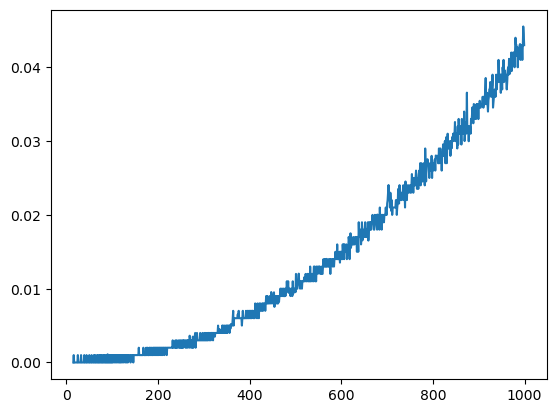

In [56]:
plt.plot(node_range,times)
plt.show()

(Made by AI, only here so I understand):

N values: [  10   20   50  100  200  500 1000]
Times (s): [1.04967142e-02 3.98617357e-02 2.50647689e-01 1.00152303e+00
 3.99976585e+00 2.49997659e+01 1.00001579e+02]

Linear fit in log-log space:
Slope (k in time ≈ C*N^k): 1.9936
Intercept (log10(C)): -3.9841


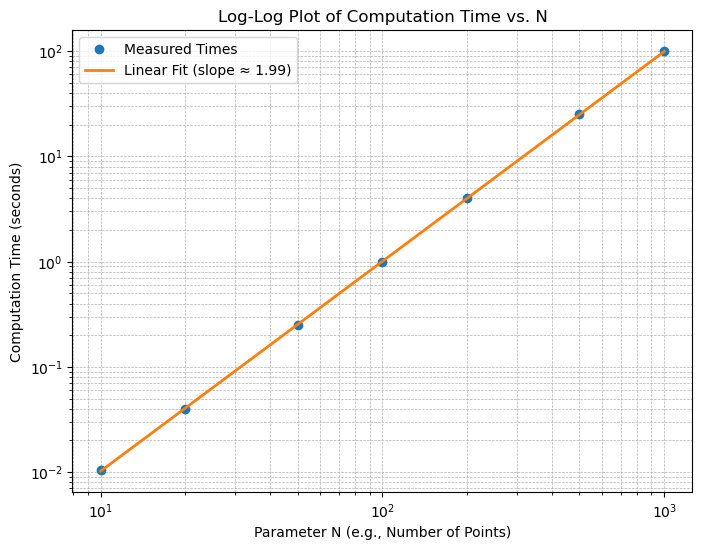


Interpretation:
The slope (1.99) suggests the computation time scales approximately as N^1.99.
If the points closely follow the line on the log-log plot,
it indicates a power-law relationship between N and time.


In [59]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Your Data ---
# Assume you have these from your program:

# Example: Parameter N that was varied (e.g., number of points/intervals)
# MAKE SURE THIS CORRESPONDS TO YOUR 'times' ARRAY
n_values = np.array([10, 20, 50, 100, 200, 500, 1000])

# Example: Your measured computation times (replace with your actual data)
# Let's simulate times roughly proportional to N^2 with some noise
np.random.seed(42) # for reproducibility
times = 0.0001 * n_values**2 + 0.001 * np.random.randn(len(n_values))
# Ensure times are positive for log
times = np.maximum(times, 1e-6) # Replace very small/negative noise with a tiny positive number

print("N values:", n_values)
print("Times (s):", times)

# --- 2. Log Transformation ---
# Take the logarithm of both N and the times.
# Using log base 10 is common for visualization, but natural log (np.log) also works.
log_n = np.log10(n_values)
log_times = np.log10(times)

# --- 3. Linear Fit (Polynomial of degree 1) ---
# Fit a line (degree 1 polynomial) to the log-transformed data:
# log_times ≈ slope * log_n + intercept
coeffs = np.polyfit(log_n, log_times, 1) # Degree 1 fit

slope = coeffs[0]
intercept = coeffs[1]

print(f"\nLinear fit in log-log space:")
print(f"Slope (k in time ≈ C*N^k): {slope:.4f}")
print(f"Intercept (log10(C)): {intercept:.4f}")

# --- 4. Generate Fitted Line Data ---
# Calculate the fitted log_times values using the slope and intercept
log_times_fit = slope * log_n + intercept

# Convert the fitted line back to the original time scale for plotting
# If you used np.log10:
times_fit = 10**log_times_fit
# If you used np.log (natural log):
# times_fit = np.exp(log_times_fit)

# --- 5. Plotting ---
plt.figure(figsize=(8, 6))

# Plot original data points on log-log scale
plt.loglog(n_values, times, 'o', label='Measured Times', markersize=6)

# Plot the fitted line on log-log scale
plt.loglog(n_values, times_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)

# Add labels and title
plt.xlabel("Parameter N (e.g., Number of Points)")
plt.ylabel("Computation Time (seconds)")
plt.title("Log-Log Plot of Computation Time vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # Add grid for both major and minor ticks

plt.show()

# --- Interpretation ---
print("\nInterpretation:")
print(f"The slope ({slope:.2f}) suggests the computation time scales approximately as N^{slope:.2f}.")
print("If the points closely follow the line on the log-log plot,")
print("it indicates a power-law relationship between N and time.")

In [122]:
n = 4
f = lambda x: np.sign(x+0.5)
fI = 1
aprox = []
difference = []
times = []
node_range = np.array([100, 200, 500, 750, 1000])
#node_range = range(1,n+20)
for i in node_range:
    starttime = time.time()
    int_aprox = kl.integ.quadrature(f, i)
    endtime = time.time()
    times.append(endtime-starttime)

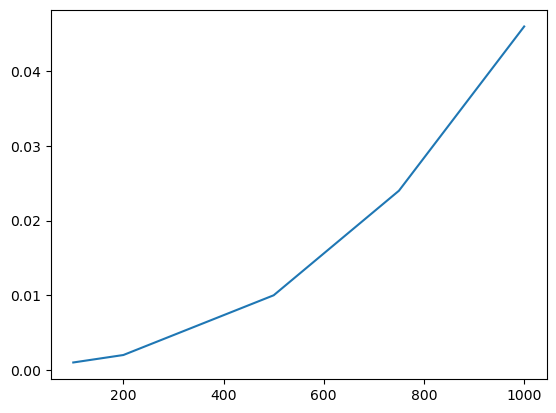

In [123]:
plt.plot(node_range,times)
plt.show()

N values: [ 100  200  500  750 1000]
Times (s): [0.0010004043579101562, 0.0020003318786621094, 0.010001659393310547, 0.02400684356689453, 0.04600977897644043]

Linear fit in log-log space:
Slope (k in time ≈ C*N^k): 1.6802
Intercept (log10(C)): -6.4577


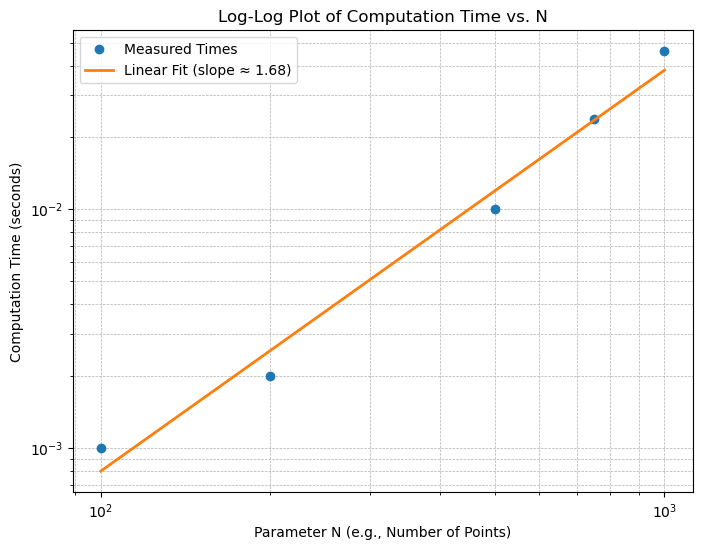

In [124]:
# --- 1. Your Data ---
# Assume you have these from your program:

# Example: Parameter N that was varied (e.g., number of points/intervals)
# MAKE SURE THIS CORRESPONDS TO YOUR 'times' ARRAY
n_values = node_range


print("N values:", n_values)
print("Times (s):", times)

# --- 2. Log Transformation ---
# Take the logarithm of both N and the times.
# Using log base 10 is common for visualization, but natural log (np.log) also works.
log_n = np.log10(n_values)
log_times = np.log10(times)

# --- 3. Linear Fit (Polynomial of degree 1) ---
# Fit a line (degree 1 polynomial) to the log-transformed data:
# log_times ≈ slope * log_n + intercept
coeffs = np.polyfit(log_n, log_times, 1) # Degree 1 fit

slope = coeffs[0]
intercept = coeffs[1]

print(f"\nLinear fit in log-log space:")
print(f"Slope (k in time ≈ C*N^k): {slope:.4f}")
print(f"Intercept (log10(C)): {intercept:.4f}")

# --- 4. Generate Fitted Line Data ---
# Calculate the fitted log_times values using the slope and intercept
log_times_fit = slope * log_n + intercept

# Convert the fitted line back to the original time scale for plotting
# If you used np.log10:
times_fit = 10**log_times_fit
# If you used np.log (natural log):
# times_fit = np.exp(log_times_fit)

# --- 5. Plotting ---
plt.figure(figsize=(8, 6))

# Plot original data points on log-log scale
plt.loglog(n_values, times, 'o', label='Measured Times', markersize=6)

# Plot the fitted line on log-log scale
plt.loglog(n_values, times_fit, '-', label=f'Linear Fit (slope ≈ {slope:.2f})', linewidth=2)

# Add labels and title
plt.xlabel("Parameter N (e.g., Number of Points)")
plt.ylabel("Computation Time (seconds)")
plt.title("Log-Log Plot of Computation Time vs. N")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # Add grid for both major and minor ticks

plt.show()
